<a href="https://colab.research.google.com/github/dornercr/DSCI511/blob/main/DSCI511_Week3_Campus_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install faker matplotlib seaborn plotly xmltodict folium --quiet

from faker import Faker
import random, json, csv, xmltodict
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from pprint import pprint

fake = Faker()
Faker.seed(42)
np.random.seed(42)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.7 MB/s eta 0:00:00


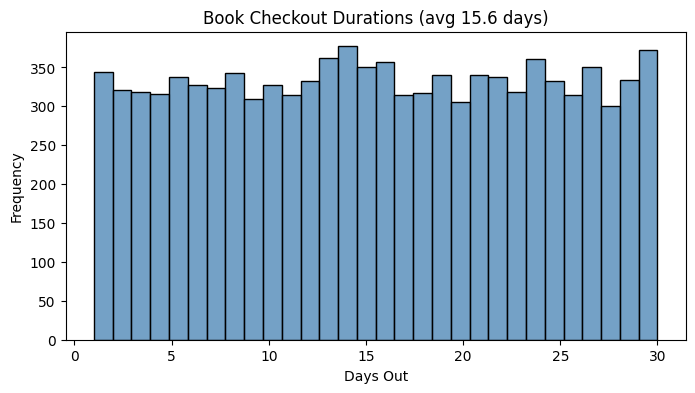

In [2]:
library_data = [
    {
        "title": fake.sentence(nb_words=4),
        "borrower": fake.first_name(),
        "days_out": random.randint(1, 30)
    }
    for _ in range(10000)
]

# Analysis Example — average checkout duration
avg_days = np.mean([x["days_out"] for x in library_data])

# Visualization — histogram of checkout lengths
plt.figure(figsize=(8,4))
sns.histplot([x["days_out"] for x in library_data], bins=30, color="steelblue")
plt.title(f"Book Checkout Durations (avg {avg_days:.1f} days)")
plt.xlabel("Days Out")
plt.ylabel("Frequency")
plt.show()


Overdue books: 5345
count    10000.000000
mean        15.571300
std          8.644859
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: days_out, dtype: float64
borrower
Michael        241
David          162
Jennifer       162
Christopher    154
James          152
John           148
Robert         135
Joseph         115
Matthew        105
William         94
Name: count, dtype: int64


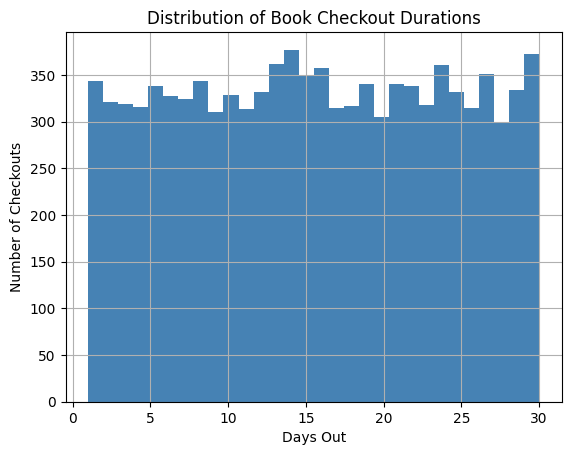

In [11]:
#analyze borrowing behavior and overdue patterns

import pandas as pd

# Convert JSON list → DataFrame
df_lib = pd.DataFrame(library_data)

# 1. View sample
df_lib.head()

# 2. Count overdue books ( >14 days )
df_lib["overdue"] = df_lib["days_out"] > 14
print("Overdue books:", df_lib["overdue"].sum())

# 3. Average & median checkout durations
print(df_lib["days_out"].describe())

# 4. Find top 10 most active borrowers
top_borrowers = df_lib["borrower"].value_counts().head(10)
print(top_borrowers)

# 5. Visualization
df_lib["days_out"].hist(bins=30, color="steelblue")
plt.title("Distribution of Book Checkout Durations")
plt.xlabel("Days Out")
plt.ylabel("Number of Checkouts")
plt.show()


Delayed buses: 0.0%


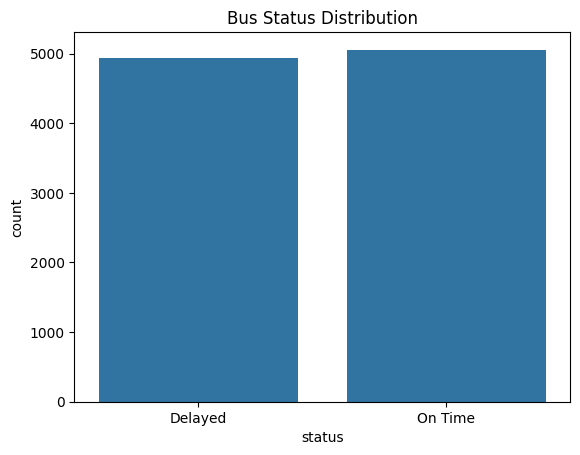

In [3]:
stops = ["North Dorms", "Science Hall", "Arts Center", "Library", "Main Quad"]
shuttle_data = [
    {
        "bus_id": f"CC{random.randint(1,50)}",
        "destination": random.choice(stops),
        "arrival_min": random.randint(1, 30),
        "status": random.choice(["On Time", "Delayed"])
    }
    for _ in range(10000)
]

# Analysis — % delayed
delayed_pct = np.mean([1 for s in shuttle_data if s["status"]=="Delayed"]) * 100 / len(shuttle_data)
print(f"Delayed buses: {delayed_pct:.1f}%")

# Visualization — delay distribution
sns.countplot(x="status", data=pd.DataFrame(shuttle_data))
plt.title("Bus Status Distribution")
plt.show()


Delayed buses: 4944
Average arrival time: 15.5 min


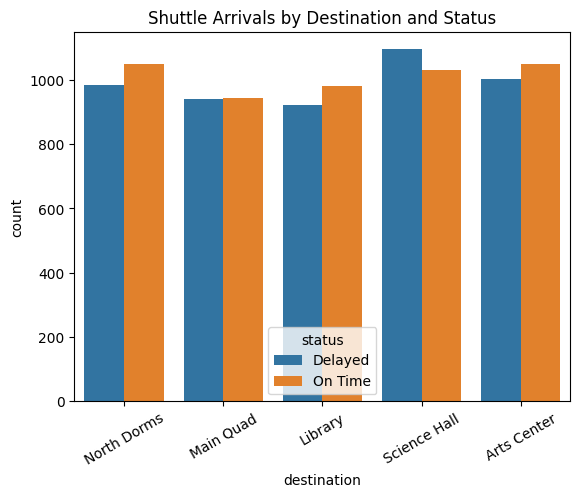

In [12]:
df_bus = pd.DataFrame(shuttle_data)

# 1. View structure
df_bus.head()

# 2. Filter delayed arrivals
delayed_df = df_bus[df_bus["status"] == "Delayed"]
print("Delayed buses:", len(delayed_df))

# 3. Compute average delay time
avg_arrival = df_bus["arrival_min"].mean()
print(f"Average arrival time: {avg_arrival:.1f} min")

# 4. Count by destination
df_bus["destination"].value_counts().head()

# 5. Visualization
sns.countplot(data=df_bus, x="destination", hue="status")
plt.title("Shuttle Arrivals by Destination and Status")
plt.xticks(rotation=30)
plt.show()


is_full
False    6677
True     3323
Name: count, dtype: int64


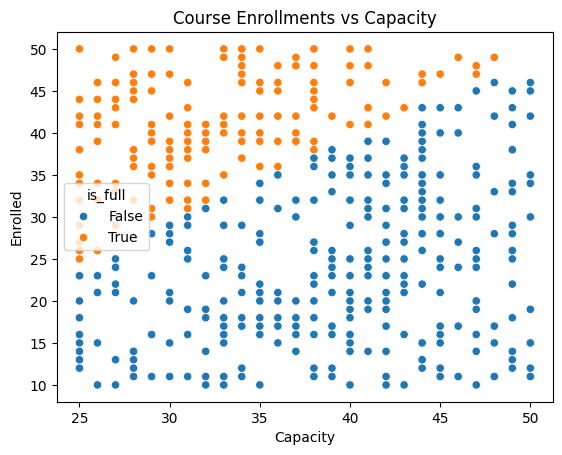

In [4]:
departments = ["CS", "MATH", "BIO", "ENG", "PSY", "MKT"]
csv_buffer = StringIO()
writer = csv.writer(csv_buffer)
writer.writerow(["Course","Enrolled","Capacity","Instructor"])

for _ in range(10000):
    enrolled = random.randint(10,50)
    capacity = random.randint(25,50)
    writer.writerow([
        f"{random.choice(departments)}{random.randint(100,499)}",
        enrolled, capacity, fake.name()
    ])

csv_buffer.seek(0)
df_courses = pd.read_csv(csv_buffer)

# Analysis — % full classes
df_courses["is_full"] = df_courses["Enrolled"] >= df_courses["Capacity"]
print(df_courses["is_full"].value_counts())

# Visualization — enrollment vs capacity
sns.scatterplot(data=df_courses.sample(500), x="Capacity", y="Enrolled", hue="is_full")
plt.title("Course Enrollments vs Capacity")
plt.show()


Full courses: 3323
Average fill ratio: 0.84
      Course  Enrolled
78   MATH166        10
140   PSY333        10
209  MATH266        10
245    CS349        10
255  MATH347        10
397   MKT317        10
402    CS356        10
418  MATH402        10
476   PSY487        10
516   ENG429        10


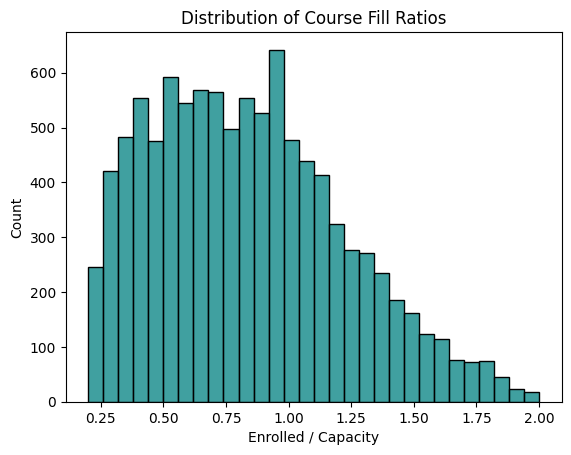

In [13]:
# CSV already loaded → df_courses
df_courses.head()

# 1. Courses that are full
full_courses = df_courses[df_courses["Enrolled"] >= df_courses["Capacity"]]
print("Full courses:", len(full_courses))

# 2. Average fill ratio
df_courses["fill_ratio"] = df_courses["Enrolled"] / df_courses["Capacity"]
print("Average fill ratio:", round(df_courses["fill_ratio"].mean(), 2))

# 3. Courses with lowest enrollment
lowest = df_courses.nsmallest(10, "Enrolled")[["Course","Enrolled"]]
print(lowest)

# 4. Visualization
sns.histplot(df_courses["fill_ratio"], bins=30, color="teal")
plt.title("Distribution of Course Fill Ratios")
plt.xlabel("Enrolled / Capacity")
plt.show()


In [5]:
buildings = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {"name": f"Building_{i}", "type": random.choice(["Academic", "Dorm", "Cafeteria"])},
            "geometry": {
                "type": "Point",
                "coordinates": [-75.15 + random.uniform(-0.02, 0.02), 39.95 + random.uniform(-0.02, 0.02)]
            }
        }
        for i in range(10000)
    ]
}

# Visualization — sample on folium map
campus_map = folium.Map(location=[39.95, -75.15], zoom_start=14)
for feature in random.sample(buildings["features"], 200):
    lon, lat = feature["geometry"]["coordinates"]
    folium.CircleMarker(
        location=[lat, lon],
        radius=3,
        popup=feature["properties"]["name"],
        color="blue" if feature["properties"]["type"]=="Academic" else "green"
    ).add_to(campus_map)

campus_map


In [14]:
import folium
from collections import Counter

# Convert features → DataFrame for analysis
features = buildings["features"]
geo_df = pd.DataFrame([
    {
        "name": f["properties"]["name"],
        "type": f["properties"]["type"],
        "lon": f["geometry"]["coordinates"][0],
        "lat": f["geometry"]["coordinates"][1],
    }
    for f in features
])

# 1. Count building types
print(Counter(geo_df["type"]))

# 2. Map sample points
campus_map = folium.Map(location=[geo_df["lat"].mean(), geo_df["lon"].mean()], zoom_start=14)
for _, row in geo_df.sample(200).iterrows():
    folium.CircleMarker(
        location=[row.lat, row.lon],
        radius=3,
        color="blue" if row.type == "Academic" else "green",
        popup=row.name
    ).add_to(campus_map)
campus_map


Counter({'Cafeteria': 3369, 'Dorm': 3331, 'Academic': 3300})


Unique authors: 9391


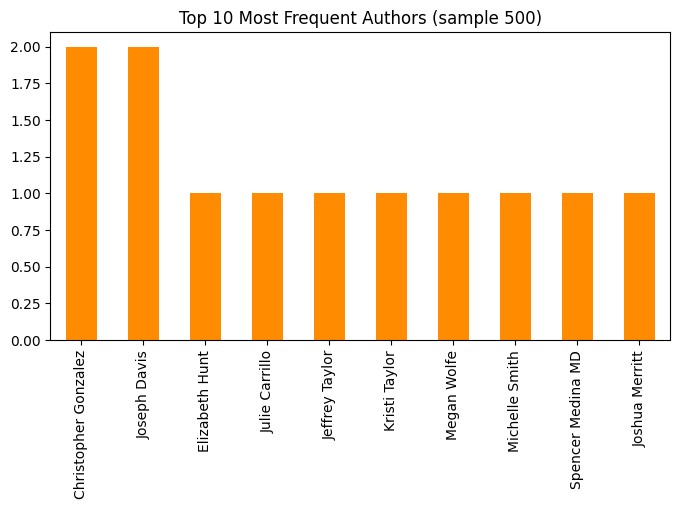

In [6]:
xml_articles = "<articles>\n"
for _ in range(10000):
    xml_articles += f"  <article><title>{fake.catch_phrase()}</title><author>{fake.name()}</author></article>\n"
xml_articles += "</articles>"

parsed_xml = xmltodict.parse(xml_articles)
parsed_list = parsed_xml["articles"]["article"]

# Example: count unique authors
unique_authors = len(set(a["author"] for a in parsed_list))
print(f"Unique authors: {unique_authors}")

# Visualization — author frequency sample
author_df = pd.Series([a["author"] for a in random.sample(parsed_list, 500)]).value_counts().head(10)
author_df.plot(kind="bar", figsize=(8,4), color="darkorange")
plt.title("Top 10 Most Frequent Authors (sample 500)")
plt.show()


author
David Johnson       8
Jason Smith         6
Michael Smith       6
David Davis         5
Richard Anderson    5
John Jones          5
David Smith         5
James Johnson       4
John Wilson         4
Julie Allen         4
Name: count, dtype: int64
AI-related articles: 0


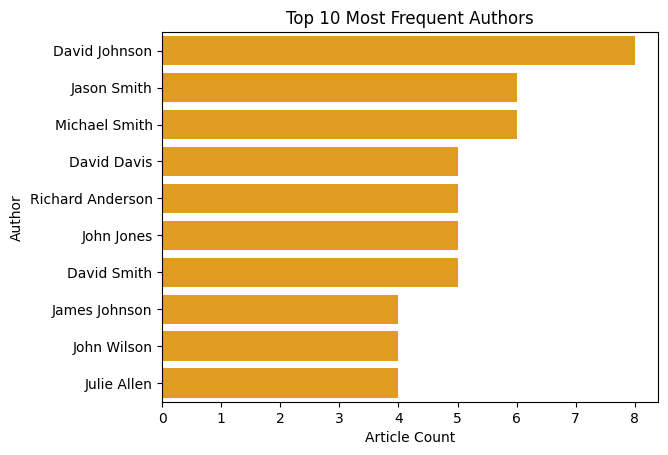

In [15]:
# Parsed list already created → parsed_list

# 1. Convert XML → DataFrame
xml_df = pd.DataFrame(parsed_list)

# 2. Count total articles per author
author_counts = xml_df["author"].value_counts().head(10)
print(author_counts)

# 3. Example text search
ai_articles = xml_df[xml_df["title"].str.contains("AI", case=False)]
print("AI-related articles:", len(ai_articles))

# 4. Visualization
sns.barplot(x=author_counts.values, y=author_counts.index, color="orange")
plt.title("Top 10 Most Frequent Authors")
plt.xlabel("Article Count")
plt.ylabel("Author")
plt.show()


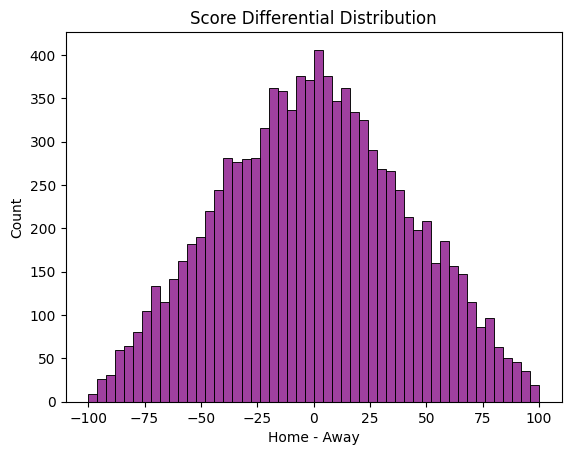

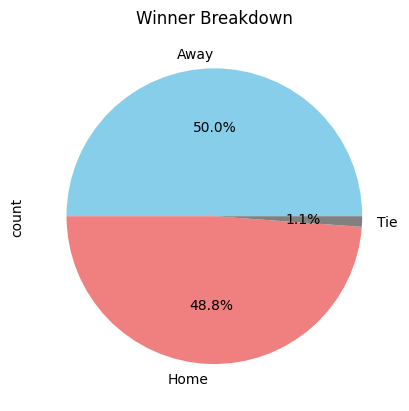

In [7]:
sports = ["Soccer", "Basketball", "Baseball", "Tennis"]
games = [
    {
        "sport": random.choice(sports),
        "home": random.randint(0,100),
        "away": random.randint(0,100)
    }
    for _ in range(10000)
]

df_games = pd.DataFrame(games)
df_games["winner"] = np.where(df_games["home"] > df_games["away"], "Home", np.where(df_games["home"] < df_games["away"], "Away", "Tie"))

# Visualization — score difference distribution
sns.histplot(df_games["home"] - df_games["away"], bins=50, color="purple")
plt.title("Score Differential Distribution")
plt.xlabel("Home - Away")
plt.show()

# Pie chart: winner breakdown
df_games["winner"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue","lightcoral","gray"])
plt.title("Winner Breakdown")
plt.show()


sport
Baseball     -1.22
Basketball    0.82
Soccer       -0.86
Tennis       -0.41
Name: diff, dtype: float64


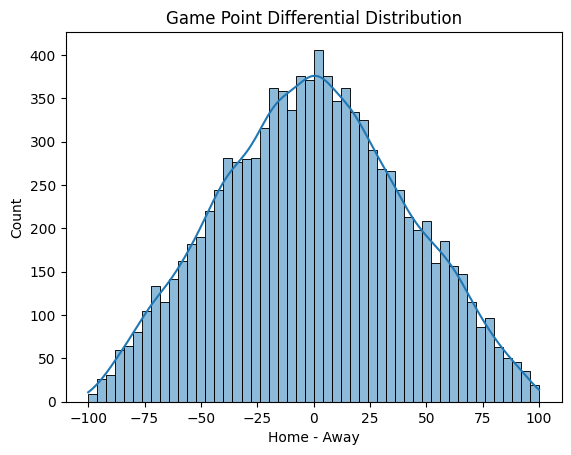

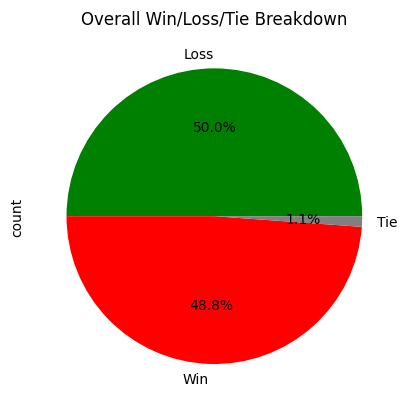

In [16]:
df_games.head()

# 1. Compute point differential
df_games["diff"] = df_games["home"] - df_games["away"]

# 2. Summary stats by sport
print(df_games.groupby("sport")["diff"].mean().round(2))

# 3. Add outcome column
df_games["result"] = np.where(df_games["diff"]>0, "Win", np.where(df_games["diff"]<0, "Loss","Tie"))

# 4. Visualization — distribution of differentials
sns.histplot(df_games["diff"], bins=50, kde=True)
plt.title("Game Point Differential Distribution")
plt.xlabel("Home - Away")
plt.show()

# 5. Pie chart — win/loss split
df_games["result"].value_counts().plot.pie(autopct="%1.1f%%", colors=["green","red","gray"])
plt.title("Overall Win/Loss/Tie Breakdown")
plt.show()


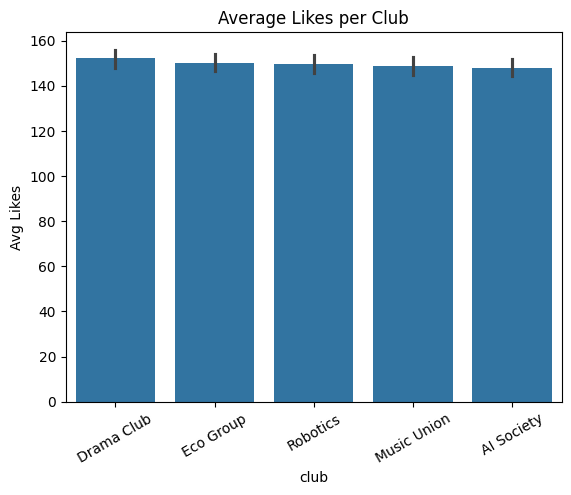

In [8]:
clubs = ["AI Society", "Drama Club", "Music Union", "Robotics", "Eco Group"]
posts = [
    {
        "timestamp": fake.date_this_year().isoformat(),
        "club": random.choice(clubs),
        "likes": random.randint(0, 300),
        "text": fake.sentence()
    }
    for _ in range(10000)
]

df_posts = pd.DataFrame(posts)
# Visualization — top 5 clubs by average likes
sns.barplot(x="club", y="likes", data=df_posts, estimator=np.mean, order=df_posts.groupby("club")["likes"].mean().sort_values(ascending=False).index)
plt.title("Average Likes per Club")
plt.ylabel("Avg Likes")
plt.xticks(rotation=30)
plt.show()


club
Drama Club     152.108471
Eco Group      150.282162
Robotics       149.708312
Music Union    148.899900
AI Society     147.805362
Name: likes, dtype: float64
Top Post: Eco Group → Action back series stock growth.


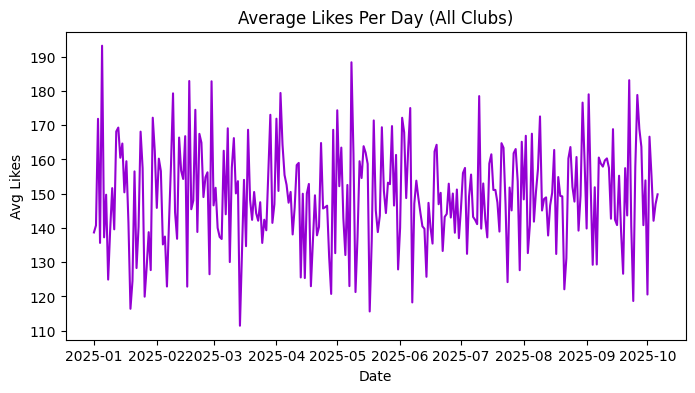

In [17]:
df_posts.head()

# 1. Average likes per club
avg_likes = df_posts.groupby("club")["likes"].mean().sort_values(ascending=False)
print(avg_likes)

# 2. Most engaging post overall
top_post = df_posts.loc[df_posts["likes"].idxmax()]
print("Top Post:", top_post["club"], "→", top_post["text"])

# 3. Trend over time
df_posts["timestamp"] = pd.to_datetime(df_posts["timestamp"])
likes_by_day = df_posts.groupby(df_posts["timestamp"].dt.date)["likes"].mean()

# 4. Visualization
likes_by_day.plot(figsize=(8,4), color="darkviolet")
plt.title("Average Likes Per Day (All Clubs)")
plt.xlabel("Date")
plt.ylabel("Avg Likes")
plt.show()


cafe
Campus Deli       3.044254
Veggie Spot       3.030813
Healthy Bites     3.021925
Global Grill      2.984321
Student Bistro    2.978290
Name: rating, dtype: float64


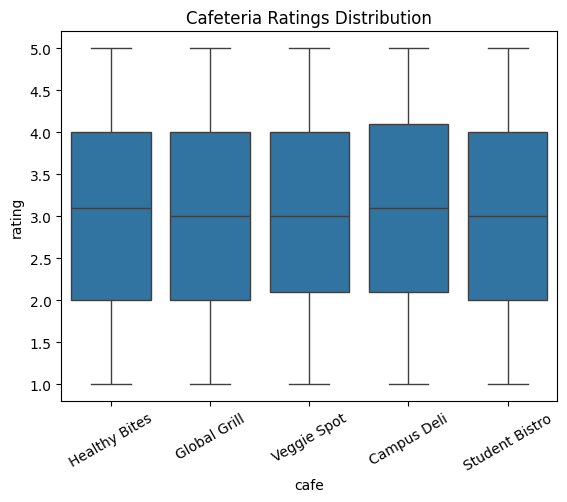

In [10]:
cafes = ["Global Grill", "Campus Deli", "Healthy Bites", "Student Bistro", "Veggie Spot"]
reviews = [
    {"cafe": random.choice(cafes), "rating": round(random.uniform(1,5),1), "reviewer": fake.first_name()}
    for _ in range(10000)
]

df_reviews = pd.DataFrame(reviews)

# Analysis — average rating per cafe
avg_ratings = df_reviews.groupby("cafe")["rating"].mean().sort_values(ascending=False)
print(avg_ratings)

# Visualization — ratings distribution
sns.boxplot(x="cafe", y="rating", data=df_reviews)
plt.title("Cafeteria Ratings Distribution")
plt.xticks(rotation=30)
plt.show()


cafe
Campus Deli       3.04
Global Grill      2.98
Healthy Bites     3.02
Student Bistro    2.98
Veggie Spot       3.03
Name: rating, dtype: float64


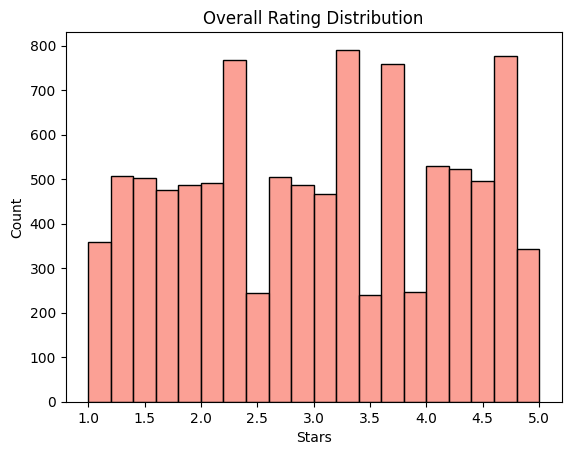

Top reviewers:
 reviewer
Michael     236
Jennifer    168
Robert      148
David       145
John        135
Name: count, dtype: int64


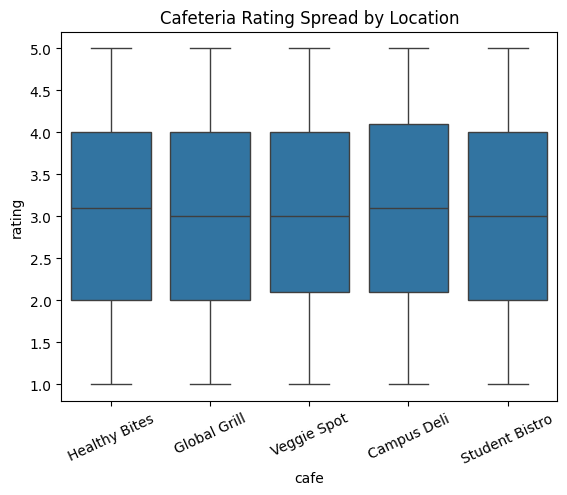

In [18]:
df_reviews.head()

# 1. Average rating per cafe
print(df_reviews.groupby("cafe")["rating"].mean().round(2))

# 2. Distribution of all ratings
sns.histplot(df_reviews["rating"], bins=20, color="salmon")
plt.title("Overall Rating Distribution")
plt.xlabel("Stars")
plt.show()

# 3. Identify top 5 reviewers by count
top_reviewers = df_reviews["reviewer"].value_counts().head(5)
print("Top reviewers:\n", top_reviewers)

# 4. Boxplot comparison
sns.boxplot(data=df_reviews, x="cafe", y="rating")
plt.title("Cafeteria Rating Spread by Location")
plt.xticks(rotation=25)
plt.show()
